In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# cache_dir indicates where to download data.I specified "." which means current directory.
# untar true will unzip it.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
img_count = len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [8]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

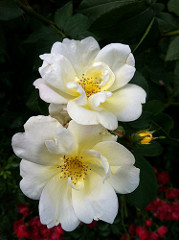

In [9]:
PIL.Image.open(str(roses[0]))

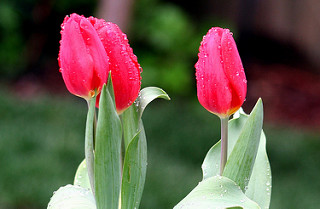

In [10]:
tulips = list(data_dir.glob("tulips/*.jpg"))
PIL.Image.open(str(tulips[0]))

<b>Read flowers images from disk into numpy array using opencv.</b>

In [11]:
flowers_images_dict = {
    
    "roses": list(data_dir.glob("roses/*.jpg")),
    "daisy": list(data_dir.glob("daisy/*.jpg")),
    "dandelion": list(data_dir.glob("dandelion/*.jpg")),
    "sunflowers": list(data_dir.glob("sunflowers/*.jpg")),
    "tulips": list(data_dir.glob("tulips/*.jpg")),
}

In [12]:
flowers_labels_dict = {
    
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4,
}

In [13]:
flowers_images_dict["roses"][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
str(flowers_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<b>Build convolutional neural network.</b>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5) 

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.3115 - loss: 1.5254
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.5879 - loss: 1.0341
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7033 - loss: 0.8099
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.7757 - loss: 0.6450
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.8542 - loss: 0.4161


In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6411 - loss: 1.0957


[1.1498219966888428, 0.6165577173233032]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


array([[ 3.6477733 ,  5.7859197 ,  1.9673172 , -7.4659495 , -1.5722156 ],
       [ 2.5316324 ,  1.4679294 , -3.926555  , -0.6011943 ,  2.3410664 ],
       [-0.01916938,  1.4821424 ,  5.7504606 , -5.207994  , -3.2616901 ],
       ...,
       [-0.35337755, -0.85976887, -0.8955872 ,  2.946412  ,  1.6575009 ],
       [ 2.7699704 , -1.2840123 ,  1.4377706 , -3.636441  ,  3.0043867 ],
       [ 1.4868847 , -2.4649045 ,  2.3152742 ,  1.8107682 ,  2.0579956 ]],
      dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0335481e-01, 8.7683094e-01, 1.9253861e-02, 1.5406437e-06,
       5.5887975e-04], dtype=float32)>

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

<b>Improve test accuracy using data augmentation.</b>

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

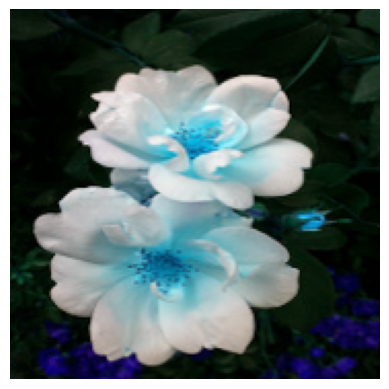

In [28]:
plt.axis('off')
plt.imshow(X[0])

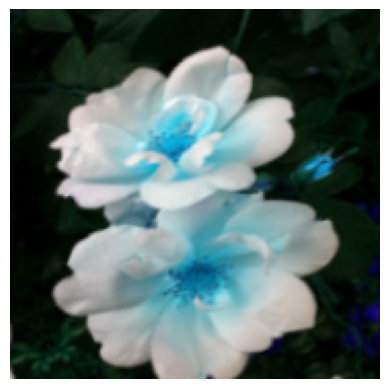

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<b>Train the model using data augmentation and a drop out layer.</b>

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)    

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.2762 - loss: 1.6822
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.5249 - loss: 1.1418
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.6118 - loss: 0.9899
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.6436 - loss: 0.9300
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.6735 - loss: 0.8311


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6094 - loss: 0.9870


[1.0139981508255005, 0.6187363862991333]